# Chap 7 EX 

## Introduction to Regression Splines (with Python codes)

Introduction

As a beginner in the world of data science, the first algorithm I was introduced to was Linear Regression. I applied it to different datasets and noticed both it’s advantages and limitations.

It assumed a linear relationship between the dependent and independent variables, which was rarely the case in reality. As an improvement over this model, I tried Polynomial Regression which generated better results (most of the time). But using Polynomial Regression on datasets with high variability chances to result in over-fitting:

<img src=https://cdn.analyticsvidhya.com/wp-content/uploads/2018/02/overfit.png>

My model always became too flexible, which does not work well with unseen data. I then came across another non-linear approach known as Regression Splines. It uses a combination of linear/polynomial functions to fit the data.

## Table of Contents

- Understanding the Data

- Quick Review of Linear Regression

- Polynomial Regression: Improvement over Linear Regression

- Walk-through of Regression Splines along with its Implementations
  - Piece wise Step Functions
  - Basis Functions
  - Piece wise Polynomials
  - Constraints and Splines
  - Cubic and Natural Cubic splines
  - Choosing the Number and Locations of the Knots
  - Comparison of Regression Splines with Polynomial Regression


## Understanding the data

Our dataset contains information like the ID, year, age, sex, marital status, race, education, region, job class, health, health insurance, log of wage and wage of various employees. 

In order to focus on spline regression in detail, I will use only ‘age’ as the independent variable to predict the wage (dependent variable).

In [74]:
# Import data
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

# Read Dataset
data = pd.read_csv('../data/Wage.csv')
data.head()

,Unnamed: 0,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [75]:
data_x = data['age']
data_y = data['wage']

# Dividing data into train and validation datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.33, random_state=1)

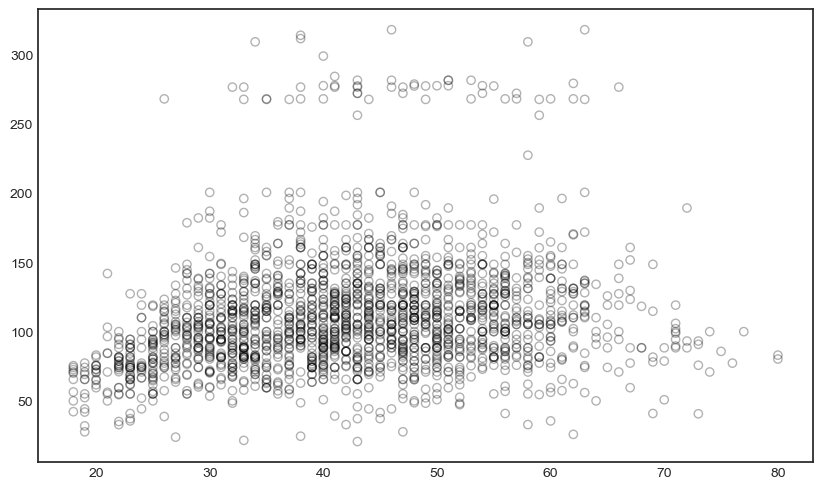

In [69]:
# Visualize the relationship b/w age and wage
plt.figure(figsize=(10,6),dpi=100)
plt.scatter(X_train, y_train,facecolor = 'none', edgecolor = 'k', alpha = 0.3)
plt.show()

What are your thoughts on the above scatter plot?
Is it positively, negatively or not correlated at all?

## LInear Rgression

In [70]:
from sklearn.linear_model import LinearRegression

# Fitting the linear regression model
X_train = np.array(X_train).reshape(-1,1)
model = LinearRegression()
model.fit(X_train,y_train)
print(f'The coefficient of the linear regression model is{model.coef_},\n The intercept is {model.intercept_}')

The coefficient of the linear regression model is[0.72190831],
 The intercept is 80.6528774116384


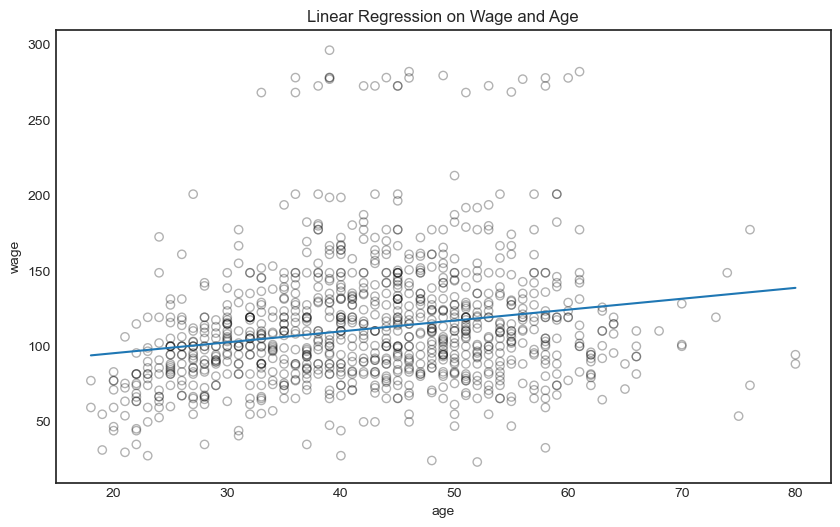

In [71]:
# Prediction on validation dataset
X_test = np.array(X_test).reshape(-1,1)
pred = model.predict(X_test)

# Visualizaion
#  We will use 70 plots between minimum and maximum values of X_test for plotting

X_70 = np.linspace(X_test.min(),X_test.max(),70)
X_70 = np.array(X_70).reshape(-1,1)

pred_plot = model.predict(X_70)


plt.figure(figsize=(10,6),dpi=100)
ax = plt.gca()
ax.scatter(X_test, y_test,facecolor = 'none', edgecolor = 'k', alpha = 0.3)
ax.plot(X_70, pred_plot)
ax.set(xlabel='age',ylabel = 'wage',
            title = 'Linear Regression on Wage and Age')
plt.show()

We can now calculate the RMSE on the predictions.

In [72]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rMSE = sqrt(mean_squared_error(y_test, pred))
print(rMSE)

40.43668748857125


We can infer from the above graph that linear regression is **not capturing all the signals available and is not the best method for solving this wage prediction.**

Although linear models are relatively simple to describe and implement and have advantages over other approaches in terms of interpretation and inference, they **have significant limitations in terms of predictive power**. This is because they assume **the linear combination between the dependent and independent variables which is almost always an approximation, and sometimes a poor one.**

## Improvement over Linear Regression: Polynomial Regression


The standard method to extend linear regression to a non-linear relationship between the dependent and independent variables, has been to replace the linear model with a polynomial function.

$$
y_i = β_0 + β_1x_i + β_2x_i^2 +  β_3x_i^3 + ⋯ + β_dx_i^d + ϵ_i,
\tag{7.1}
$$

where $ϵ_i$ is the $error\ term$.

As we increase the power value, the curve obtained contains high oscillations which will lead to shapes that are over-flexible. **Such curves lead to over-fitting.**

In [99]:
# Import the splitted dataset
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.33, random_state=1)

# Generating weights for polynomial function with Degree = 2,4,12,16 and 25
X_train = np.array(X_train)

weights_2 = np.polyfit(X_train, y_train, 2)
weights_4 = np.polyfit(X_train, y_train, 4)
weights_12 = np.polyfit(X_train, y_train, 12)
weights_16 = np.polyfit(X_train, y_train, 16)
weights_25 = np.polyfit(X_train, y_train, 25)

print(weights_2)
print(weights_4)
print(weights_2)
print(weights_12)
print(weights_16)
print(weights_25)

[ -0.05194765   5.22868974 -10.03406116]
[-4.58962275e-05  9.10115001e-03 -6.94994507e-01  2.42916196e+01
 -2.08514898e+02]
[ -0.05194765   5.22868974 -10.03406116]
[-1.41653595e-15  8.19188170e-13 -2.14619897e-10  3.36466733e-08
 -3.51048440e-06  2.56348308e-04 -1.34082938e-02  5.05081598e-01
 -1.35697072e+01  2.53030730e+02 -3.10212290e+03  2.24162440e+04
 -7.20806753e+04]
[-1.42783030e-20  9.25927341e-18 -2.66649591e-15  4.42016869e-13
 -4.47991588e-11  2.50063768e-09 -6.13298333e-09 -1.23178071e-05
  1.22677010e-03 -7.03673137e-02  2.76610319e+00 -7.78435245e+01
  1.57436616e+03 -2.23982925e+04  2.12948498e+05 -1.21448081e+06
  3.14031160e+06]
[-3.05184164e-37  1.23479168e-34 -1.68673853e-32  4.67043337e-31
  7.56503233e-29 -2.36020654e-27 -4.57607849e-25  3.09444375e-24
  2.73865080e-21  5.77503466e-20 -1.45997503e-17 -6.82521634e-16
  7.32959436e-14  4.83057117e-12 -4.10744217e-10 -2.40645882e-08
  2.80682393e-06  2.50564732e-05 -1.60671356e-02  1.13994584e+00
 -4.44350870e+01  1

/usr/local/Caskroom/miniconda/base/envs/p39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/Caskroom/miniconda/base/envs/p39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [118]:
# # Import the splitted dataset
# X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.33, random_state=1)

# # Generating weights for polynomial function with Degree = 2,4,12,16 and 25
# X_train = np.array(X_train)

# #  Reorganize ???
# d = list((2,4,12,16,25))

# for i in d:
#     weights[i] = np.polyfit(X_train,y_train, i)
#     model[i] = np.poly1d(weights[i])
#     pred[i] = model[i](X_test)
#     pred_plot[i] = model[i](X_70)



In [119]:
#  Generating model with the given weights = 2,4,12,16,25
model_2 = np.poly1d(weights_2)
model_4 = np.poly1d(weights_4)
model_12 = np.poly1d(weights_12)
model_16 = np.poly1d(weights_16)
model_25 = np.poly1d(weights_25)

# Prediction on validation set
pred_2 = model_2(X_test)
pred_4 = model_4(X_test)
pred_12 = model_12(X_test)
pred_16 = model_16(X_test)
pred_25 = model_25(X_test)

# We will plot the graph for 70 observations only
X_70 = np.linspace(X_test.min(), X_test.max(),70)

pred_plot_2 = model_2(X_70)
pred_plot_4 = model_4(X_70)
pred_plot_12 = model_12(X_70)
pred_plot_16 = model_16(X_70)
pred_plot_25 = model_25(X_70)

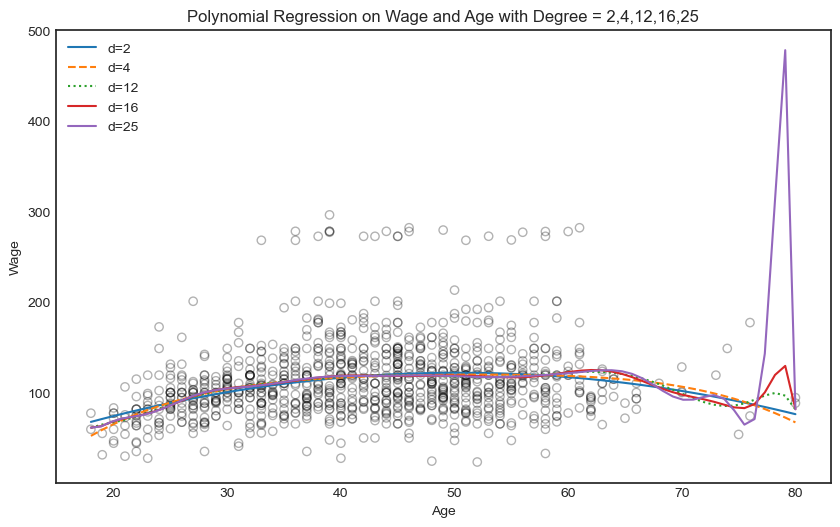

In [125]:
plt.figure(figsize=(10,6),dpi=100)
ax = plt.gca()
ax.scatter(X_test, y_test,facecolor = 'none', edgecolor = 'k', alpha = 0.3)
ax.plot(X_70, pred_plot_2, label='d=2')
ax.plot(X_70, pred_plot_4,"--",label='d=4')
ax.plot(X_70, pred_plot_12,":",label='d=12')
ax.plot(X_70, pred_plot_16,label='d=16')
ax.plot(X_70, pred_plot_25,label='d=25')
ax.set(xlabel='Age',ylabel = 'Wage',
            title = 'Polynomial Regression on Wage and Age with Degree = 2,4,12,16,25')
plt.legend()
plt.show()

## Piecewise Step Functions

One of the most common piecewise functions is a Step function.Step function is a function which **remains constant within the interval**. We can fit individual step functions to each of the divided portions in order to avoid imposing a global structure. Here we break the range of $X$ into bins, and fit a different constant in each bin.

In [130]:
# Import the splitted dataset
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.33, random_state=1)
#  Dividing the data into 4 bins
df_cut, bins = pd.cut(X_train,4,retbins = True,right=True)
df_cut.value_counts(sort = False)

(17.938, 33.5]    504
(33.5, 49.0]      941
(49.0, 64.5]      511
(64.5, 80.0]       54
Name: age, dtype: int64

In [135]:
df_steps = pd.concat([X_train, df_cut,y_train], keys = ['age','age_cuts','wage'], axis = 1)

# Create dummy variables for the age groups
df_steps_dummies = pd.get_dummies(df_cut)
df_steps_dummies.head()

,"(17.938, 33.5]","(33.5, 49.0]","(49.0, 64.5]","(64.5, 80.0]"
1382,0,1,0,0
23,0,1,0,0
2140,0,0,1,0
1117,1,0,0,0
933,0,1,0,0


In [154]:
df_steps_dummies.columns = ['17.938-33.5','33.5-49','49-64.5','64.5-80']

# Fitting Generalised linear models
fit_3 = sm.GLM(df_steps.wage, df_steps_dummies).fit()

# Binning validation set into same 4 bins
bin_mapping = np.digitize(X_test, bins)
X_valid = pd.get_dummies(bin_mapping)

# Removing and outliers
X_valid = X_valid.drop([5], axis=1)

# Prediction
pred_2 =fit_3.predict(X_valid)

In [150]:
# Calculating RMSE

rMSE = sqrt(mean_squared_error(y_test, pred_2))
print(rMSE) 

39.99060078376046


In [160]:
#  We will plot the graph for 70 observations only
# X_70
bin_mapping = np.digitize(X_70,bins)
X_valid_2 = pd.get_dummies(bin_mapping).drop([5], axis=1)
pred_2 = fit_3.predict(X_valid_2)

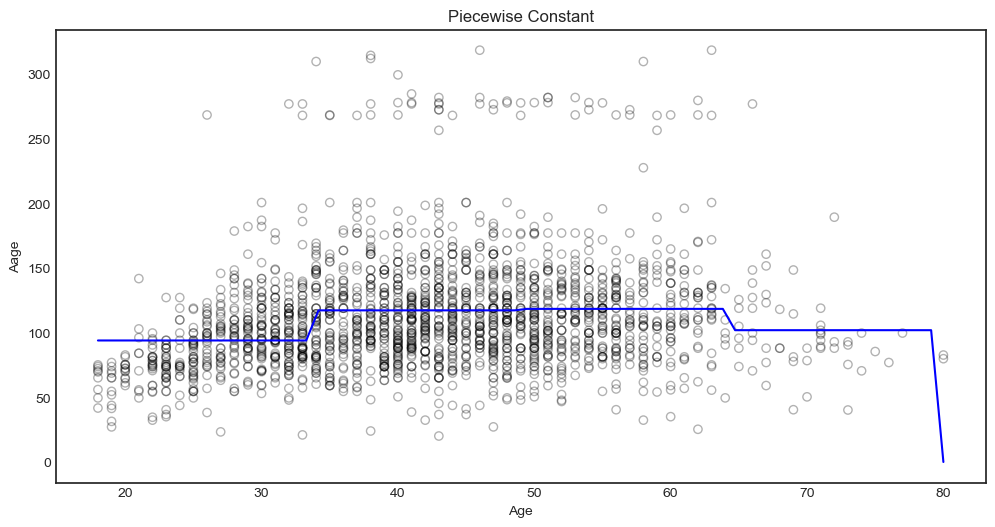

In [168]:
#  VIsualization
plt.figure(figsize=(12,6),dpi=100)
ax = plt.gca()
ax.scatter(X_train, y_train,facecolor = 'none', edgecolor = 'k', alpha = 0.3)
ax.plot(X_70, pred_2,c='b')
ax.set(xlabel='Age',ylabel = 'Aage',
            title = 'Piecewise Constant')
plt.show()


## Cubic and Natural Cubic Splines

Cubic spline is a piecewise polynomial with a set of extra constraints (continuity, continuity of the first derivative, and continuity of the second derivative).

In general, a cubic spline with K knots uses cubic spline with a total of 4 + K degrees of freedom. 

There is seldom any good reason to go beyond cubic-splines (unless one is interested in smooth derivatives).

In [194]:
from patsy import dmatrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [195]:
# Generating cubic spline with 3 knots at 25, 40 and 60
transformed_x = dmatrix("bs(train, knots=(25,40,60),degree=3, include_intercept=False)", {"train": X_train}, return_type='dataframe')

# Fitting generalized linear model on transformed dataset
fit_1 = sm.GLM(y_train, transformed_x).fit()

In [196]:
# Generating cubic spline with 4 knots
transformed_x_2 = dmatrix("bs(train, knots=(25,40,50,65), degree=3, include_intercept=False)", {"train": X_train}, return_type='dataframe')

# Fitting generalized linear model on transformed dataset
fit_2 = sm.GLM(y_train, transformed_x_2).fit()

In [214]:
# Predictions on both splines
pred_1 = fit_1.predict(dmatrix("bs(valid, knots=(25,40,60), include_intercept=False)", {"valid":X_test}, return_type='dataframe'))

pred_2 = fit_2.predict(dmatrix("bs(valid, knots=(25, 40,50,65), degree=3, include_intercept=False)", {"valid":X_test}, return_type='dataframe'))

# calculating rmse
rms_1 = sqrt(mean_squared_error(y_test, pred_1))
rms_2 = sqrt(mean_squared_error(y_test, pred_2))

print(f'RMSE of the cubic spline with 3 knots at 25, 40 and 60 is {rms_1},\n that of the cubic spline with 4 knots at 25,40,50,65 is {rms_2}')

RMSE of the cubic spline with 3 knots at 25, 40 and 60 is 39.40318768389144,
 that of the cubic spline with 4 knots at 25,40,50,65 is 39.34292609196198


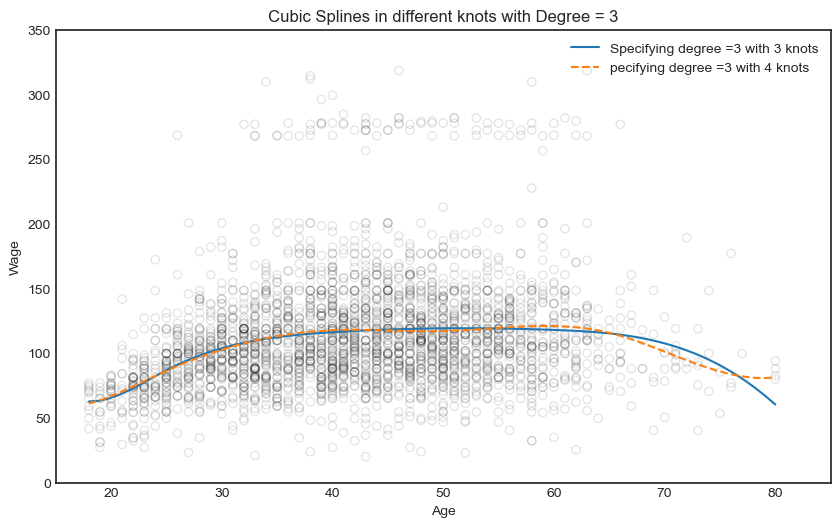

In [221]:
# We will plot the graph for 70 observations only
# X_70
pred_1 = fit_1.predict(dmatrix("bs(xp, knots=(25,40,60), include_intercept=False)", {"xp": X_70}, return_type='dataframe'))
pred_2 = fit_2.predict(dmatrix("bs(xp, knots=(25,40,50,65),degree =3, include_intercept=False)", {"xp": X_70}, return_type='dataframe'))


# Plot the splines and error bands

plt.figure(figsize=(10,6),dpi=100)
ax = plt.gca()
ax.scatter(data.age,data.wage,facecolor = 'none', edgecolor = 'k', alpha = 0.1)
ax.plot(X_70, pred_1, label='Specifying degree =3 with 3 knots')
ax.plot(X_70, pred_2,"--",label='pecifying degree =3 with 4 knots')
ax.set(xlabel='Age',ylabel = 'Wage',
            xlim=ax.set_xlim(15,85),
            ylim=ax.set_ylim(0,350),
            title = 'Cubic Splines in different knots with Degree = 3')
plt.legend()
plt.show()

We know that the **behavior of polynomials that are fit to the data tends to be erratic near the boundaries.** 

Such variability can be dangerous.These problems are resembled by splines, too. 

The polynomials fit beyond the boundary knots behave even more wildly than the corresponding global polynomials in that region. To smooth the polynomial beyond the boundary knots, we will use a special type of spline known as **Natural Spline**.

A natural cubic spline **adds additional constraints**, namely that the function is linear beyond the boundary knots.

This constrains the cubic and quadratic parts there to 0, each reducing the degrees of freedom by 2. That’s 2 degrees of freedom at each of the two ends of the curve, reducing K+4 to K.

### Generating natural cubic spline

In [218]:
transformed_x_3 = dmatrix("cr(train,df = 3)", {"train": X_train}, return_type='dataframe')
fit_3 = sm.GLM(y_train, transformed_x_3).fit()

# Prediction on validation set
pred_3 = fit_3.predict(dmatrix("cr(valid, df=3)", {"valid": X_test}, return_type='dataframe'))
# Calculating RMSE value
rms = sqrt(mean_squared_error(y_test, pred_3))
print(rms)

39.448238138036565


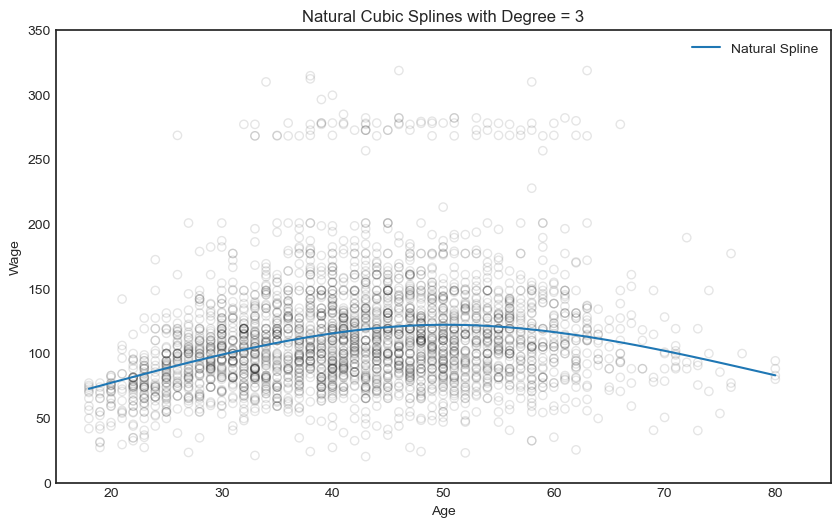

In [220]:
# We will plot the graph for 70 observations only
# X_70
pred_3 = fit_3.predict(dmatrix("cr(xp, df=3)", {"xp": X_70}, return_type='dataframe'))
# PLot the spline

plt.figure(figsize=(10,6),dpi=100)
ax = plt.gca()
ax.scatter(data.age,data.wage,facecolor = 'none', edgecolor = 'k', alpha = 0.1)
ax.plot(X_70, pred_3, label='Natural Spline')
ax.set(xlabel='Age',ylabel = 'Wage',
            xlim=ax.set_xlim(15,85),
            ylim=ax.set_ylim(0,350),
            title = 'Natural Cubic Splines with Degree = 3')
plt.legend()
plt.show()
